In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.drop(['Surname'],axis='columns',inplace=True)


In [ ]:
df.drop(['RowNumber'],axis='columns',inplace=True)

In [ ]:
df.drop(['CustomerId'],axis='columns',inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 11)

In [ ]:
df.isnull().values.any()

False

In [ ]:
text_data = ['Geography','Gender']

In [ ]:
for columns in text_data:
  print(f'{columns} : {df[columns].unique()}')

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [ ]:
df.replace('Female',1,inplace = True)
df.replace('Male',2,inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.Gender.unique()

array([1, 2])

In [ ]:
df = pd.get_dummies(data = df,columns=['Geography'])

In [ ]:
credit_churn_yes = df[df.Exited == 1].CreditScore
credit_churn_no = df[df.Exited == 0].CreditScore


In [ ]:
credit_churn_yes.head()

0     619
2     502
5     645
7     376
16    653
Name: CreditScore, dtype: int64

In [ ]:
credit_churn_no.head()

1    608
3    699
4    850
6    822
8    501
Name: CreditScore, dtype: int64

In [ ]:
credit_churn_yes.shape

(2037,)

In [ ]:
credit_churn_no.shape

(7963,)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


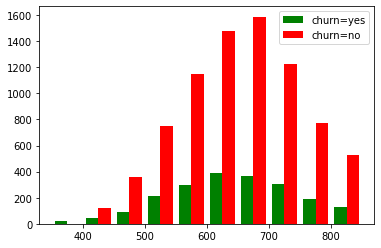

In [ ]:
plt.hist([credit_churn_yes,credit_churn_no],color=['green','red'],label=['churn=yes','churn=no'])
plt.legend()

In [ ]:
salary_churn_yes = df[df.Exited == 1].EstimatedSalary
salary_churn_no = df[df.Exited == 0].EstimatedSalary

In [ ]:
salary_churn_no.head()

1    112542.58
3     93826.63
4     79084.10
6     10062.80
8     74940.50
Name: EstimatedSalary, dtype: float64

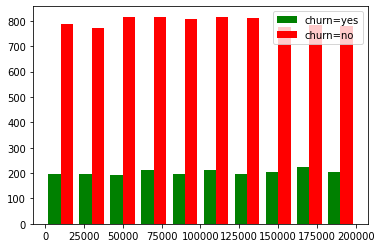

In [ ]:
plt.hist([salary_churn_yes,salary_churn_no],color=['green','red'],label=['churn=yes','churn=no'])
plt.legend()

In [ ]:
df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [ ]:
#scaling data

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
cols_to_scale = ['CreditScore','Balance','EstimatedSalary']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale ] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,42,2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,1,41,1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,1,42,8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,1,39,1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,1,43,2,0.500246,1,1,1,0.395400,0,0,0,1


In [ ]:
for columns in df:
  print(f'{columns} : {df[columns].unique()}')

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [ ]:
print(df.Balance)

0       0.000000
1       0.334031
2       0.636357
3       0.000000
4       0.500246
          ...   
9995    0.000000
9996    0.228657
9997    0.000000
9998    0.299226
9999    0.518708
Name: Balance, Length: 10000, dtype: float64


In [ ]:
age_churn_yes = df[df.Exited == 1 ].Age
age_churn_no = df[df.Exited == 0 ].Age

In [ ]:
age_churn_yes.head()

0     42
2     42
5     44
7     29
16    58
Name: Age, dtype: int64

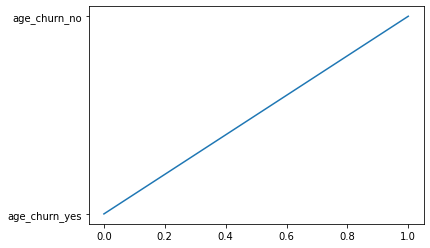

In [ ]:
#doubt here as age feature is showing between 0 and 1 but if print seperately actual age is seen
plt.plot(['age_churn_yes','age_churn_no'],label=['churn = yes','churn=no'])

In [ ]:
#dropping age column
df.drop(['Age'],axis='columns',inplace=True)


In [ ]:
df.head()

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,1,1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,1,8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,1,1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,1,2,0.500246,1,1,1,0.395400,0,0,0,1


In [ ]:
x = df.drop('Exited',axis='columns')
y = df['Exited']

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [ ]:
y_train.shape

(8000,)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
x_test.shape

(2000, 11)

In [ ]:
len(x_train.columns)

11

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(11,input_shape=(11,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 0.5195 - accuracy: 0.7865
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7960
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.7960
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7951
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.7931
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.7951
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7964
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.7936
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.7944
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.7937

In [ ]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 984us/step - loss: 0.3950 - accuracy: 0.8220


[0.39498165249824524, 0.8220000267028809]

In [ ]:
y_p = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
#2 dimesion array as output
y_p[:5]

array([[0.47459218],
       [0.33294252],
       [0.15721908],
       [0.21646664],
       [0.1021839 ]], dtype=float32)

In [ ]:
#1d array
y_test[:5]

9394    0
898     1
2398    0
5906    0
2343    0
Name: Exited, dtype: int64

In [ ]:
y_pred = []
for element in y_p:
  if element > 0.5:
     y_pred.append(1)
  else:
     y_pred.append(0)


In [ ]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1595
           1       0.58      0.43      0.50       405

    accuracy                           0.82      2000
   macro avg       0.72      0.68      0.69      2000
weighted avg       0.81      0.82      0.81      2000



Text(69.0, 0.5, 'Truth')

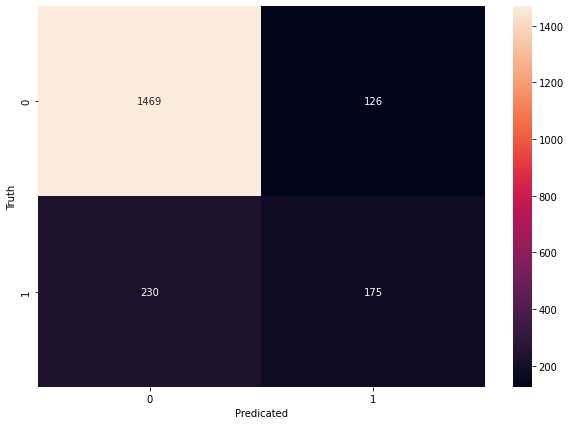

In [ ]:
import seaborn as sn 
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicated')
plt.ylabel('Truth')

In [ ]:
(1469+175)/(1469+126+230+175)

0.822